Develop a Sanke similar to https://www.ultianalytics.com/app/#/4597087672991744/team
But separately for O and D lines

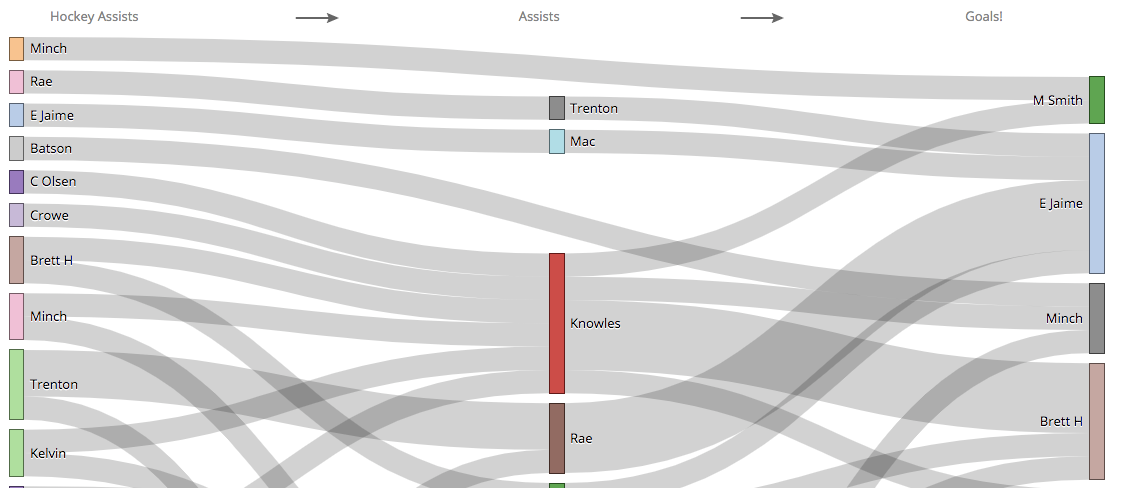

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from src.data.utils import load_raw_data, DATA_DIR

In [3]:
# Import plotly and set to work offline (ie, render plots here rather than plotly)
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [4]:
df = pd.read_csv(f'{DATA_DIR}/raw/AUDL2018_ChicagoWildfire.csv')
df.head()

,Unnamed: 0,Date/Time,Opponent,Point Elapsed Seconds,Line,Our Score - End of Point,Their Score - End of Point,Event Type,Action,Passer,...,Absolute Distance,Lateral Distance,Toward Our Goal Distance,Teamname,Tournament,Lineup,GameID,QuarterID,PointID,PossessionID
0,0,2018-04-14 17:11,Pittsburgh Thunderbirds,53,O,1,0,Offense,Catch,Nicky Golini,...,NaN,NaN,NaN,Chicago Wildfire,AUDL 2018,"Dan Miller, Simon Johansen, Pawel Janas, Micha...",1,1,1,1.0
1,1,2018-04-14 17:11,Pittsburgh Thunderbirds,53,O,1,0,Offense,Catch,Pawel Janas,...,NaN,NaN,NaN,Chicago Wildfire,AUDL 2018,"Dan Miller, Simon Johansen, Pawel Janas, Micha...",1,1,1,1.0
2,2,2018-04-14 17:11,Pittsburgh Thunderbirds,53,O,1,0,Offense,Catch,Simon Johansen,...,NaN,NaN,NaN,Chicago Wildfire,AUDL 2018,"Dan Miller, Simon Johansen, Pawel Janas, Micha...",1,1,1,1.0
3,3,2018-04-14 17:11,Pittsburgh Thunderbirds,53,O,1,0,Offense,Catch,Pawel Janas,...,NaN,NaN,NaN,Chicago Wildfire,AUDL 2018,"Dan Miller, Simon Johansen, Pawel Janas, Micha...",1,1,1,1.0
4,4,2018-04-14 17:11,Pittsburgh Thunderbirds,53,O,1,0,Offense,Catch,Simon Johansen,...,NaN,NaN,NaN,Chicago Wildfire,AUDL 2018,"Dan Miller, Simon Johansen, Pawel Janas, Micha...",1,1,1,1.0


In [5]:
def get_goal_flows(df, line='both'):
    if line != 'both':
        df = df.loc[df.Line == line]
    df = df.loc[(df.Action == "Goal") & (df['Event Type'] == 'Offense')][['Passer', 'Receiver']].dropna(how='any')
    # There's a bug where plotly sankes can't handle circularity, so add suffixes
    #df['Passer'] = df.Passer + ''
    df['Receiver'] = df.Receiver + ' '
    return df.groupby(['Passer', 'Receiver']).agg(lambda x: len(x)).reset_index().rename(columns={0:'Value'})

data = get_goal_flows(df, line='D')
players = set(data.Passer.tolist() + data.Receiver.tolist())
player_dict = {j:i for i,j in enumerate(players)}
data['Source'] = data.Passer.map(player_dict)
data['Target'] = data.Receiver.map(player_dict)
#data['Passer'] = data['Passer'].transform(lambda x: len(x))
#data['Receiver'] = data['Receiver'].transform(lambda x: len(x))
data.head()

,Passer,Receiver,Value,Source,Target
0,Alex Rummelhart,Bill Kluender,1,33,27
1,Alex Rummelhart,Drew Levorsen,1,33,3
2,Bill Kluender,Alex Rummelhart,1,21,40
3,Bill Kluender,Drew Levorsen,1,21,3
4,Bill Kluender,Jeff Weis,1,21,45


In [7]:


data_trace = dict(
    type='sankey',
    # width = 1118,
    # height = 772,
#     domain = dict(
#       x =  [0,1],
#       y =  [0,1]
#     ),
#     orientation = "h",
#     valueformat = ".0f",
#     valuesuffix = "TWh",
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label = list(player_dict.keys()),
      #color =  df_raw['Color']
    ),
    link = dict(
      source =  data['Source'],
      target =  data['Target'],
      value =  data['Value'],
      label =  data['Passer']
  ))


iplot([data_trace])